<a href="https://colab.research.google.com/github/prabalpandey2411/220940325048_Prabal_Pandey/blob/main/Financial_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Define Objectives
Goal: Forecast financial metrics (e.g., revenue, expenses, stock prices) and analyze trends for decision-making.
Key Steps:
Load and clean financial data.
Perform exploratory data analysis (EDA).
Use time series forecasting models (e.g., ARIMA, Prophet).
Visualize trends and predictions.

In [ ]:
!pip install pandas numpy matplotlib seaborn statsmodels pmdarima
!pip install prophet  # For advanced forecasting


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.0 MB/s eta 0:00:00


In [19]:
import pandas as pd

# Upload the dataset
from google.colab import files
uploaded = files.upload()




Saving financial_data.csv to financial_data.csv


In [20]:
!ls

'BBCA.JK_monthly new.csv'  'BBCA.JK_weekly  new.csv'   Finance_data.csv     sample_data
'BBCA.JK new.csv'	   'Finance_data (1).csv'      financial_data.csv


In [21]:
# Load the data
data = pd.read_csv('financial_data.csv')  # Replace with your file name
print(data.head())
print(data.info())

         Date  Revenue  Expenses  Profit  Stock Price
0  2022-01-01   150000     80000   70000          120
1  2022-02-01   160000     85000   75000          125
2  2022-03-01   155000     82000   73000          123
3  2022-04-01   165000     87000   78000          128
4  2022-05-01   170000     90000   80000          130
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         12 non-null     object
 1   Revenue      12 non-null     int64 
 2   Expenses     12 non-null     int64 
 3   Profit       12 non-null     int64 
 4   Stock Price  12 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 612.0+ bytes
None


In [22]:
print(data.describe())

             Revenue       Expenses         Profit  Stock Price
count      12.000000      12.000000      12.000000    12.000000
mean   177916.666667   93750.000000   84166.666667   134.166667
std     18763.883749    9420.721841    9350.093177     9.350093
min    150000.000000   80000.000000   70000.000000   120.000000
25%    163750.000000   86500.000000   77250.000000   127.250000
50%    177500.000000   93500.000000   84000.000000   134.000000
75%    191250.000000  100500.000000   90750.000000   140.750000
max    210000.000000  110000.000000  100000.000000   150.000000


In [26]:
# Ensure the date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)  # Set Date as the index


In [23]:
# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values
data.fillna(method='ffill', inplace=True)


Date           0
Revenue        0
Expenses       0
Profit         0
Stock Price    0
dtype: int64


<ipython-input-23-04f005555307>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Step 5: Exploratory Data Analysis (EDA)

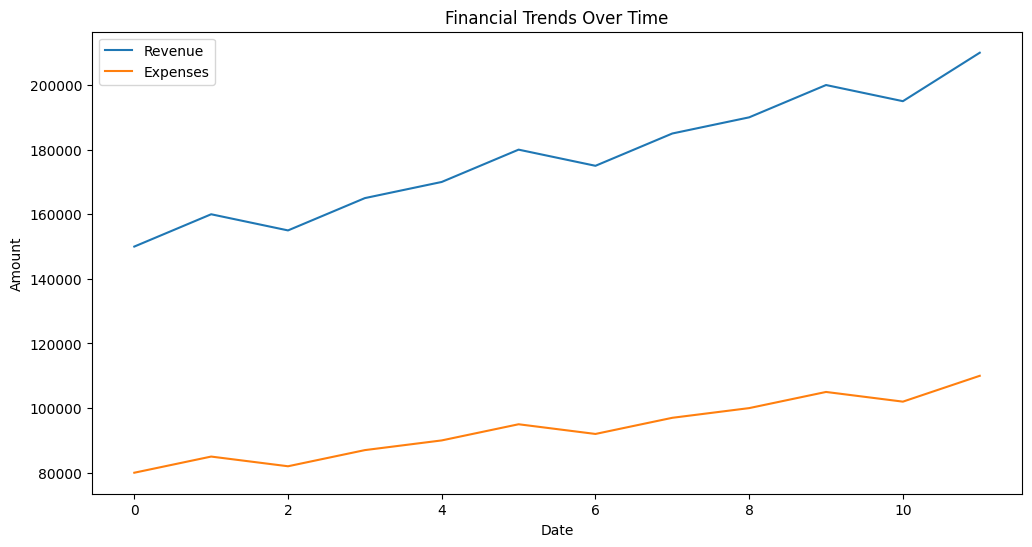

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot financial metrics over time
plt.figure(figsize=(12, 6))
plt.plot(data['Revenue'], label='Revenue')
plt.plot(data['Expenses'], label='Expenses')
plt.title('Financial Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()



Correlation Analysis

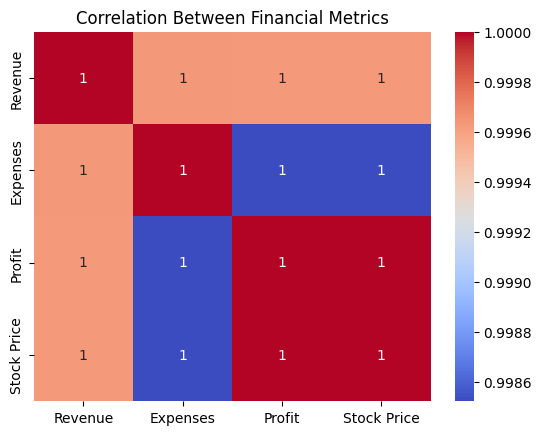

In [27]:
# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Financial Metrics')
plt.show()


Step 6: Time Series Forecasting

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the revenue time series
decomposition = seasonal_decompose(data['Revenue'], model='additive', period=12)
decomposition.plot()
plt.show()


ValueError: x must have 2 complete cycles requires 24 observations. x only has 12 observation(s)

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your data has monthly frequency, adjust the period accordingly
# If the frequency is different, change the period value.
# For example, if it's quarterly data, use period=4.

# Calculate the frequency of your data
freq = pd.infer_freq(data.index)

# Set the period based on the frequency
if freq == 'M':  # Monthly data
    period = 12
elif freq == 'Q':  # Quarterly data
    period = 4
# ... add more conditions for other frequencies if needed ...
else:
    # If frequency can't be inferred, try to estimate it
    # or set a reasonable period based on your data
    period = 12  # Default to 12 for annual seasonality

# Perform seasonal decomposition with the adjusted period
decomposition = seasonal_decompose(data['Revenue'], model='additive', period=period)
decomposition.plot()
plt.show()

ValueError: x must have 2 complete cycles requires 24 observations. x only has 12 observation(s)

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# ... (Your previous code to infer frequency and set period) ...

# Check if there are enough observations for decomposition
if len(data['Revenue']) < 2 * period:
    print(f"Warning: Insufficient data for seasonal decomposition with period {period}. "
          f"You have {len(data['Revenue'])} observations, but need at least {2 * period}.")
    # Consider alternative analysis or gathering more data
else:
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(data['Revenue'], model='additive', period=period)
    decomposition.plot()
    plt.show()

In [33]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = auto_arima(data['Revenue'], seasonal=True, m=12, trace=True)
print(model.summary())

# Forecast future values
forecast_period = 12  # Forecast next 12 months
model_fit = ARIMA(data['Revenue'], order=model.order).fit()
forecast = model_fit.forecast(steps=forecast_period)
print(forecast)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ValueError: There are no more samples after a first-order seasonal differencing. See http://alkaline-ml.com/pmdarima/seasonal-differencing-issues.html for a more in-depth explanation and potential work-arounds.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwjgxf3gv/bnrkzerv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwjgxf3gv/0a_ok9lj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3004', 'data', 'file=/tmp/tmpwjgxf3gv/bnrkzerv.json', 'init=/tmp/tmpwjgxf3gv/0a_ok9lj.json', 'output', 'file=/tmp/tmpwjgxf3gv/prophet_modelpd_lqbkx/prophet_model-20250118224508.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:45:08 - cmdstanpy - INFO - Chain [1] start processing
INF

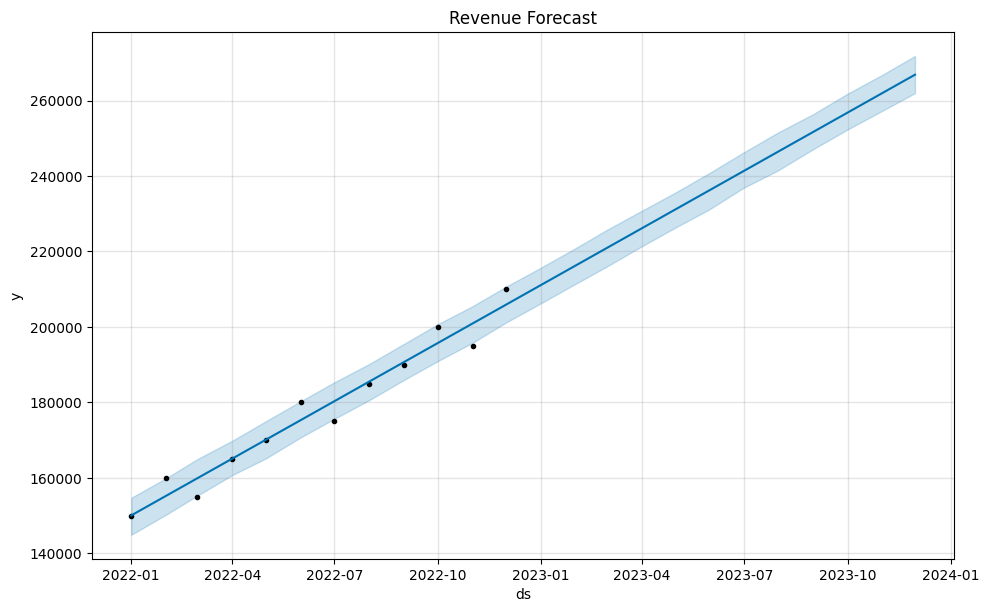

In [34]:
from prophet import Prophet

# Prepare data for Prophet
prophet_data = data.reset_index()[['Date', 'Revenue']]
prophet_data.columns = ['ds', 'y']

# Fit Prophet model
model = Prophet()
model.fit(prophet_data)

# Make future predictions
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Revenue Forecast')
plt.show()


In [35]:
train = data.iloc[:-12]
test = data.iloc[-12:]

# Compare actual vs. predicted values
predictions = model_fit.forecast(steps=12)
print("Actual:", test['Revenue'].values)
print("Predicted:", predictions)


NameError: name 'model_fit' is not defined

In [36]:
train = data.iloc[:-12]
test = data.iloc[-12:]

# Re-initialize and fit the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
model = auto_arima(data['Revenue'], seasonal=True, m=12, trace=True)
model_fit = ARIMA(data['Revenue'], order=model.order).fit()  # Fit the model here


# Compare actual vs. predicted values
predictions = model_fit.forecast(steps=12)
print("Actual:", test['Revenue'].values)
print("Predicted:", predictions)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ValueError: There are no more samples after a first-order seasonal differencing. See http://alkaline-ml.com/pmdarima/seasonal-differencing-issues.html for a more in-depth explanation and potential work-arounds.

In [37]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model, adjusting seasonal differencing if necessary
# If the error persists, consider:
# 1. Reducing the seasonal period (m) if possible.
# 2. Gathering more data to increase the length of the time series.
# 3. Trying a different model or approach if the data is highly seasonal.
try:
    model = auto_arima(data['Revenue'], seasonal=True, m=12, trace=True)
except ValueError:
    # If ValueError occurs due to insufficient data after differencing,
    # try reducing the seasonal differencing order (D)
    model = auto_arima(data['Revenue'], seasonal=True, m=12, trace=True, D=0)
    # D=0 disables seasonal differencing

print(model.summary())

#

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=224.982, Time=4.54 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=229.660, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=233.411, Time=0.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=232.497, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=233.051, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=222.863, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=224.870, Time=0.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=226.874, Time=1.00 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=224.115, Time=0.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,0)[12] intercept   : AIC=234.639, Time=0.83 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=235.232, Time=1.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(1,0,0)[12] intercept   : AIC=236.483, Time=0.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,0,0)[12] intercept   : AIC=239.088, Time=1.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,0)[12] intercept   : AIC=inf, Time=0.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12]             : AIC=220.867, Time=0.41 sec
 ARIMA(2,1,2)(0,0,0)[12]             : AIC=inf, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[12]             : AIC=222.869, Time=0.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,1)[12]             : AIC=223.020, Time=0.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[12]             : AIC=inf, Time=0.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[12]             : AIC=224.875, Time=0.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12]             : AIC=inf, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[12]             : AIC=inf, Time=0.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,0)[12]             : AIC=222.114, Time=0.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,0)[12]             : AIC=232.639, Time=0.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(1,1,3)(1,0,0)[12]             : AIC=234.483, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,0,0)[12]             : AIC=234.160, Time=0.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,0)[12]             : AIC=inf, Time=0.50 sec

Best model:  ARIMA(2,1,2)(1,0,0)[12]          
Total fit time: 21.887 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   12
Model:             SARIMAX(2, 1, 2)x(1, 0, [], 12)   Log Likelihood                -104.434
Date:                             Sat, 18 Jan 2025   AIC                            220.867
Time:                                     22:47:03   BIC                            223.254
Sample:                                 01-01-2022   HQIC                           219.362
                                      - 12-01-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test['Revenue'], predictions)
mse = mean_squared_error(test['Revenue'], predictions)
print(f"MAE: {mae}, MSE: {mse}")


NameError: name 'predictions' is not defined

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'model_fit' is your fitted ARIMA model
predictions = model_fit.forecast(steps=12)  # Generate predictions

mae = mean_absolute_error(test['Revenue'], predictions)
mse = mean_

NameError: name 'model_fit' is not defined

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'model' is your fitted auto_arima model, refit ARIMA
model_fit = ARIMA(data['Revenue'], order=model.order).fit()  # Re-fit the ARIMA model

# Generate predictions
predictions = model_fit.forecast(steps=12)

mae = mean_absolute_error(test['Revenue'], predictions)
mse = mean_squared_error(test['Revenue'], predictions) # Fix: Complete 'mean_squared_error'
print(f"MAE: {mae}, MSE: {mse}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

MAE: 64204.579242753796, MSE: 4137675820.3361764


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


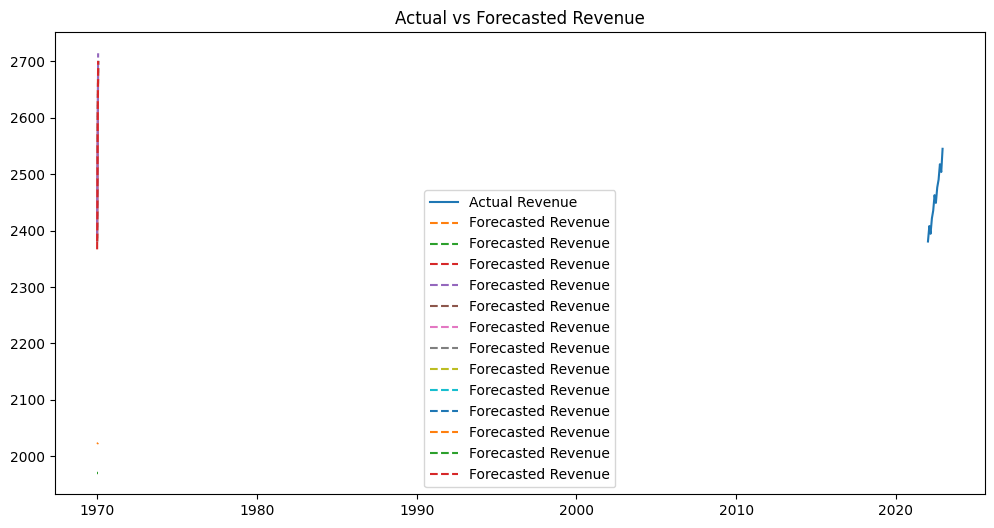

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(data['Revenue'], label='Actual Revenue')
plt.plot(forecast, label='Forecasted Revenue', linestyle='--')
plt.title('Actual vs Forecasted Revenue')
plt.legend()
plt.show()


In [43]:
forecast.to_csv('revenue_forecast.csv', index=False)

# Download the file
from google.colab import files
files.download('revenue_forecast.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>